In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [13]:
df_april = pd.read_csv('MF_Holding\\QuantMon\\QuantMon_Jan.csv')
df_may = pd.read_csv('MF_Holding\\QuantMon\\QuantMon_June.csv')
df_april.drop('SR', axis=1, inplace=True)
df_may.drop('SR', axis=1, inplace=True)

In [14]:
# create a merged dataframe, replace NaN with 0, and keep only a single industry and name column
df_merged = pd.merge(df_april, df_may, how='outer', on='ISIN', suffixes=('_April', '_May'))

# create a single column for industry, by taking the non-null value from the two columns
df_merged['Industry'] = df_merged['INDUSTRY_April'].combine_first(df_merged['INDUSTRY_May'])
df_merged['Name'] = df_merged['NAME_April'].combine_first(df_merged['NAME_May'])

# fill NaN with 0
df_merged.fillna(0, inplace=True)
df_merged.drop(['INDUSTRY_April', 'INDUSTRY_May', 'NAME_April', 'NAME_May'], axis=1, inplace=True)

# sort columns by aplhabetical order except ISIN, Industry, and Name
cols = df_merged.columns.tolist()
cols.remove('ISIN')
cols.remove('Industry')
cols.remove('Name')
cols.sort()
cols = ['ISIN','Name','Industry'] + cols
df_merged = df_merged[cols]
df_merged.head()

,ISIN,Name,Industry,%_NAV_April,%_NAV_May,MARKET_VALUE_April,MARKET_VALUE_May,QUANTITY_April,QUANTITY_May
0,INE002A01018,Reliance Industries Limited,Petroleum Products,9.11,10.68,6549.64,22713.95,229550.0,725500.0
1,INE002L01015,SJVN Limited,Power,6.28,0.00,4514.15,0.00,3425000.0,0.0
2,INE019C01026,Himadri Speciality Chemical Limited,Chemicals & Petrochemicals,3.69,0.00,2654.14,0.00,709000.0,0.0
3,INE031A01017,Housing & Urban Devlopment Company Ltd,Finance,6.59,2.20,4739.63,4667.92,2750000.0,1660000.0
4,INE040A01034,HDFC Bank Limited,Banks,0.00,10.39,0.00,22083.04,0.0,1311500.0


In [15]:
# make a Holding_Change change column, incase of 0 in denominator, replace with 'newly added'
df_merged['Holding_Change'] = ((df_merged['QUANTITY_May'] - df_merged['QUANTITY_April'])/df_merged['QUANTITY_April'])*100
df_merged['Holding_Change'] = df_merged['Holding_Change'].replace([float('inf'), -float('inf')], '1000')
df_merged.to_csv('QuantMon_Holding_Change_JanToJune.csv', index=False)
df_merged.head()

,ISIN,Name,Industry,%_NAV_April,%_NAV_May,MARKET_VALUE_April,MARKET_VALUE_May,QUANTITY_April,QUANTITY_May,Holding_Change
0,INE002A01018,Reliance Industries Limited,Petroleum Products,9.11,10.68,6549.64,22713.95,229550.0,725500.0,216.053147
1,INE002L01015,SJVN Limited,Power,6.28,0.00,4514.15,0.00,3425000.0,0.0,-100.0
2,INE019C01026,Himadri Speciality Chemical Limited,Chemicals & Petrochemicals,3.69,0.00,2654.14,0.00,709000.0,0.0,-100.0
3,INE031A01017,Housing & Urban Devlopment Company Ltd,Finance,6.59,2.20,4739.63,4667.92,2750000.0,1660000.0,-39.636364
4,INE040A01034,HDFC Bank Limited,Banks,0.00,10.39,0.00,22083.04,0.0,1311500.0,1000


In [16]:
df_merged.drop(['ISIN', 'Name', 'Holding_Change'], axis=1, inplace=True)

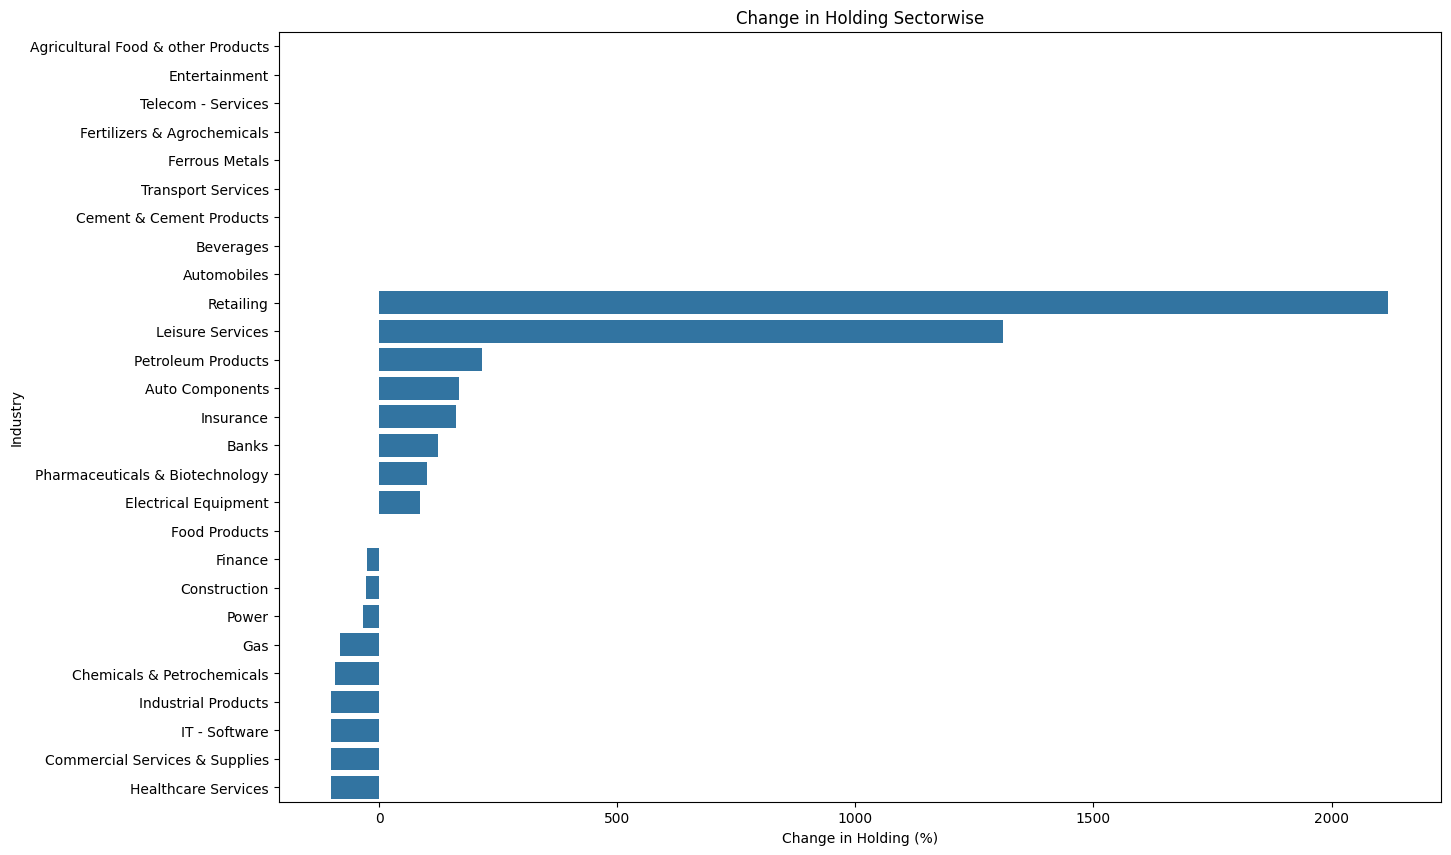

In [17]:

df_merged_grouped = df_merged.groupby('Industry').sum()
df_merged_grouped.head()
df_merged_grouped['Holding_Change'] = ((df_merged_grouped['QUANTITY_May'] - df_merged_grouped['QUANTITY_April'])/df_merged_grouped['QUANTITY_April'])*100

# sort the dataframe by Holding_Change
df_merged_grouped.sort_values('Holding_Change', ascending=False, inplace=True)

# plot the change in holding for each industry
plt.figure(figsize=(15, 10))
sns.barplot(x='Holding_Change', y=df_merged_grouped.index, data=df_merged_grouped)
plt.xlabel('Change in Holding (%)')
plt.ylabel('Industry')
plt.title('Change in Holding Sectorwise')
plt.show()
